# Overview
Vaccination is a key technique used to fight diseases. It is specifically helpful in fighting infectious diseases. Through the use of immunization the spread of diseases can be reduced because it provides herd immunity.
The aim of this project is to predict whether individuals got the H1N! flu vaccine based on data obtained from the United States National 2009 H1N1 flu survey.
The respondents were asked whether they received the H1N1 flu vaccine in conjuction with questions about themselves that provided data about various features such as whether they had health insurance or if they were health workers.

# Business Understanding 
A vaccine for the H1N1 flu virus became publicly available in October 2009. In late 2009 and early 2010, the United States conducted the National 2009 H1N1 Flu Survey. The aim of the survey was to find out if individuals took the vaccine or not. The classification model in this project will help know whether one took the vaccine or not based on certain traits. In the future this study can then be used by the stakeholders in the public health sector to know which groups of the population to target for vaccination.

# Data understanding
The data for this project was obtained from .It contains 35 features investigated from 26707 observations which were the responses provided to the survey questions.

# Metrics of success
The final model will be considered a success if it has f1 score of not less 75%. The goal is to make as accurate as possible predictions, that is why the choice of success metrics is the accuracy score and f1 score.

**Importing the necessary libraries**

In [212]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import Lasso, Ridge, LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

**Loading the dataset and have a preview**

In [213]:

training_set_features_df = pd.read_csv("training_set_features.csv")

training_set_features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


**Exploring the dataset to check the number of rows and columns**

In [214]:

num_rows, num_columns = training_set_features_df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)



Number of rows: 26707
Number of columns: 36


**We check for the data types in our dataset**

In [215]:
training_set_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

Loading the label dataset and exploring the dataset.

In [216]:
training_set_labels_df = pd.read_csv("training_set_labels.csv")
training_set_labels_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


Checking the number of observations and features in our dataset

In [217]:

num_rows, num_columns = training_set_labels_df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 26707
Number of columns: 3


Determining the data types of our labels dataset

In [218]:
training_set_labels_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


**Data Preparation**

Our dataset contains responses to whether our respondent recieved the H1N1 vaccine or seasonal flu vaccine. Our target for this project only requires data related to H1N1. Thefore the steps that follow will involve the removal of any data that relates the seasonal flu. It will also involve handling of inconsistencies in our dataset

In [219]:
#We begin with the features dataframe. Here we drop all columns related to the seasonal flu vaccine

training_set_features_df= training_set_features_df.drop(['doctor_recc_seasonal', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc'], axis=1)
training_set_features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [220]:
#Dropping the seasonal vaccine column in our labels dataset
training_set_labels_df = training_set_labels_df.drop(['seasonal_vaccine'], axis=1)
training_set_labels_df.head()

,respondent_id,h1n1_vaccine
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


Creating a dataframe combined_df that contains both the features and the labels dataframes joined into one DataFrame. 

In [221]:
combined_df = training_set_features_df.merge(training_set_labels_df, on='respondent_id', how='left')
print(combined_df.shape)
combined_df.head()

(26707, 33)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0


In [222]:
#Loading data from our test dataframe and getting a preview of it
test_set_features_df = pd.read_csv("test_set_features.csv")
test_set_features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [223]:
#Columns related to the seasonal flu are also dropped in this dataframe
test_set_features_df  =test_set_features_df.drop(['doctor_recc_seasonal', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc'], axis=1)
test_set_features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


Checking combined_df for missing values

In [224]:
combined_df.isna().sum().sum()

57089

In [225]:
import pandas as pd

def missing_values(df):
    missing = df.isnull().sum()
    percentage = (df.isnull().sum() / len(df))
    missing_df = pd.DataFrame({"No of missing values": missing, "Percentage": percentage})
    missing_df.drop(missing_df[missing_df["Percentage"] == 0].index, inplace=True)
    return missing_df  # Return missing_df instead of missing

# Assuming combined_df is your DataFrame containing both features and labels
missing_df = missing_values(combined_df)
print(missing_df)


                             No of missing values  Percentage
h1n1_concern                                   92    0.003445
h1n1_knowledge                                116    0.004343
behavioral_antiviral_meds                      71    0.002658
behavioral_avoidance                          208    0.007788
behavioral_face_mask                           19    0.000711
behavioral_wash_hands                          42    0.001573
behavioral_large_gatherings                    87    0.003258
behavioral_outside_home                        82    0.003070
behavioral_touch_face                         128    0.004793
doctor_recc_h1n1                             2160    0.080878
chronic_med_condition                         971    0.036358
child_under_6_months                          820    0.030704
health_worker                                 804    0.030104
health_insurance                            12274    0.459580
opinion_h1n1_vacc_effective                   391    0.014640
opinion_

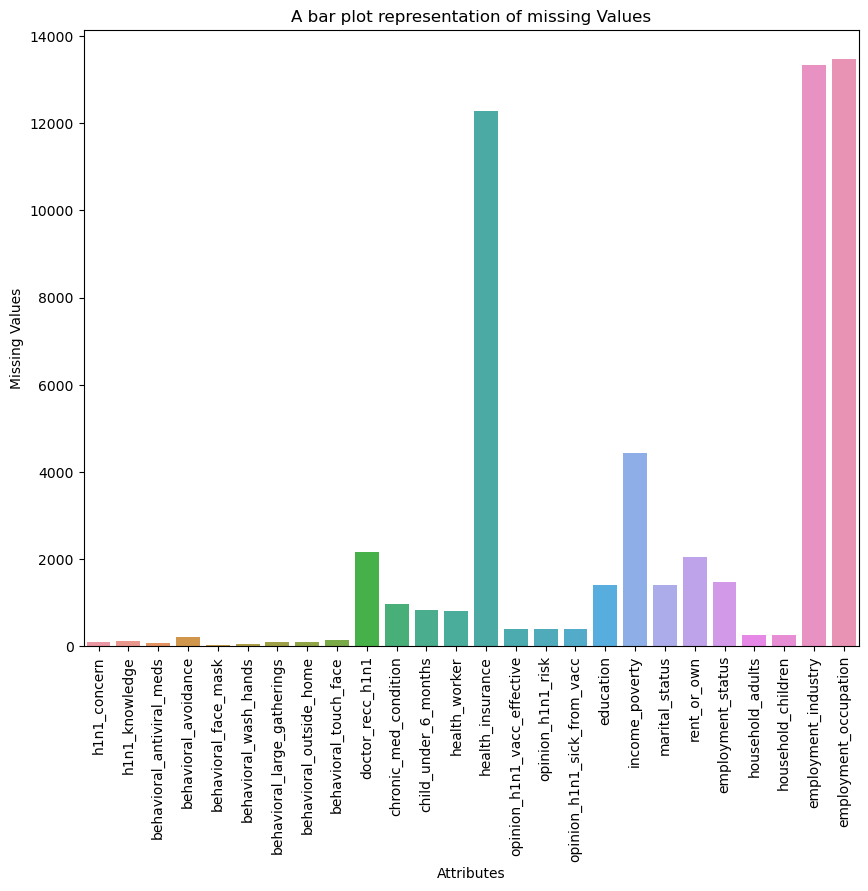

In [226]:
#  graphical representation to get a better understanding of the distribution of missing values
fig, axes = plt.subplots(figsize = (10, 8))
sns.barplot(x = missing_df.index , y = missing_df["No of missing values"])
plt.xlabel("Attributes",)
plt.xticks(rotation = 'vertical')
plt.ylabel("Missing Values")
plt.title("A bar plot representation of missing Values")
plt.show()

The columns **health insurance, employment industry and employment occupation** seem to have a very high percentage of missing values and will therefore need to be dropped

In [227]:
combined_df = combined_df.drop(['employment_occupation', 'employment_industry', 'health_insurance'],axis=1)
combined_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0


To handle the missing value in our dataset we use a method called backward filling this technique uses the next valid observation along the column and uses to fill our missing value.

In [228]:
combined_df.fillna(method="bfill", inplace=True)
#The method below checks if there are any null values left
combined_df.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
h1n1_vaccine                   0
dtype: int

The columns **respondent_id, hhs_geo_region** are irrelevent to our study and therefore we will need to drop them.

In [229]:
combined_df = combined_df.drop(['respondent_id', 'hhs_geo_region'], axis=1)
combined_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [230]:
#We then remove any duplicate values from our dataset

combined_df = combined_df.drop_duplicates()

**EDA**

Univariate analysis

This section involves the exploration of our data to then determine which combination of varibales from our dataset will provide us with information on whether one got vaccinated or not. Our aim is to find which features correlate best with our target variable.

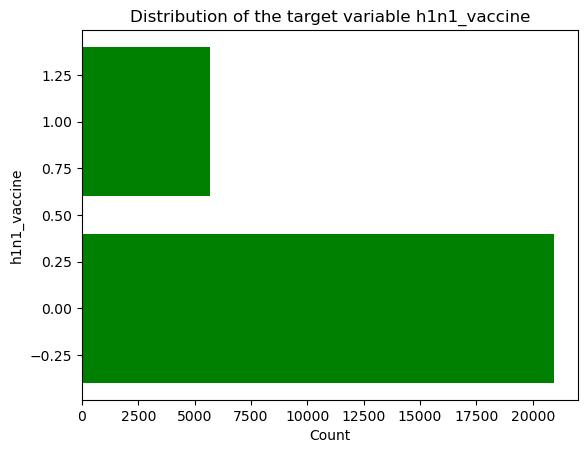

In [231]:
#our target variable in this case is the column h1n1_vaccine

h1n1_vaccine = combined_df["h1n1_vaccine"]
unique_values, counts = np.unique(h1n1_vaccine, return_counts=True)
fig, ax = plt.subplots()
ax.barh(unique_values, counts, color='green')
ax.set_xlabel('Count')
ax.set_ylabel('h1n1_vaccine')
ax.set_title('Distribution of the target variable h1n1_vaccine')
plt.show()

Our analysis from the above data shows that around 20% of the whole population received the H1N1 flu vaccine.

**Bivariate analysis**

In this stage we look at how various features of our dataset are correlated with the target variable. To begin we will use the h1n1_knowledge, the knowledge one has about h1n1 and the target variable h1n1_vaccine.

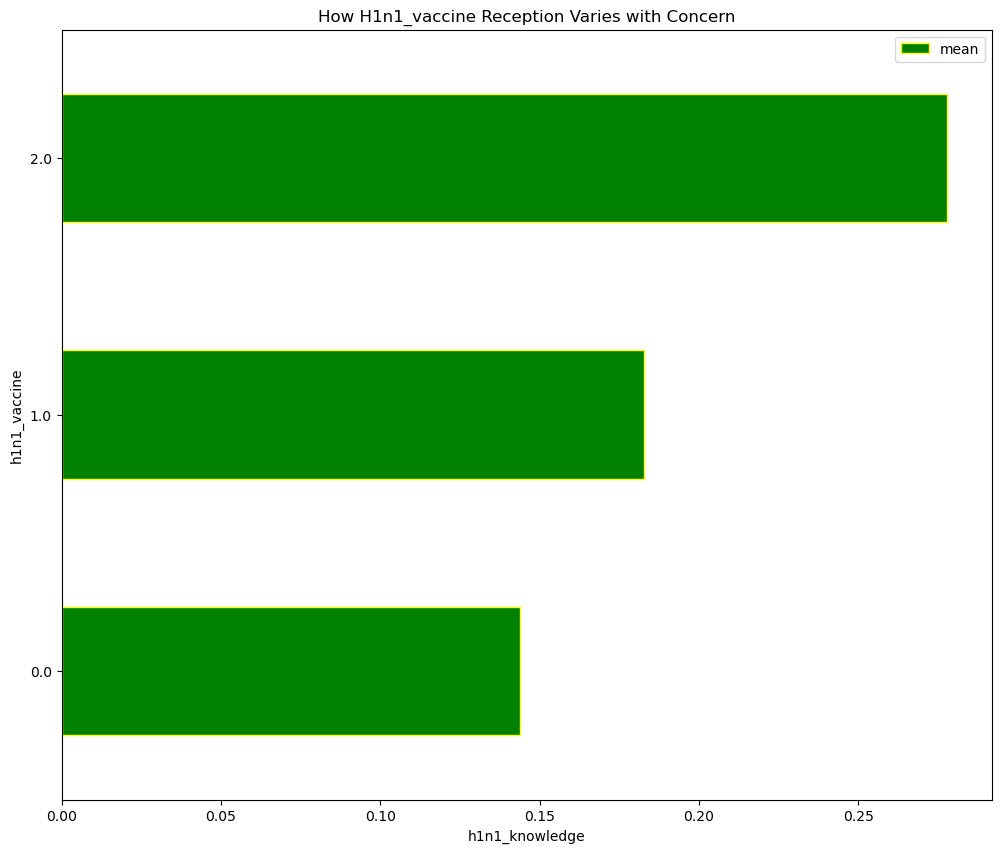

In [232]:


combined_df.groupby('h1n1_knowledge')['h1n1_vaccine'].agg(['mean']).plot(kind='barh',
                                                                    figsize=(12,10),
                                                                    color='green',
   edgecolor="yellow")
plt.xlabel('h1n1_knowledge')  
plt.ylabel('h1n1_vaccine') 
plt.title('How H1n1_vaccine Reception Varies with Concern')
plt.show()  


From the above it is evident that the more the knowledge one has about H1N1 vaccine the more they are likely to receive the vaccine.

**Multi-variate analysis**

In this section we will check for the correlation of between other variables in our dataset and the the target variables to determine the level of influence it has on one's decision to get the vaccine.


In [233]:
combined_df_

NameError: name 'combined_df_' is not defined

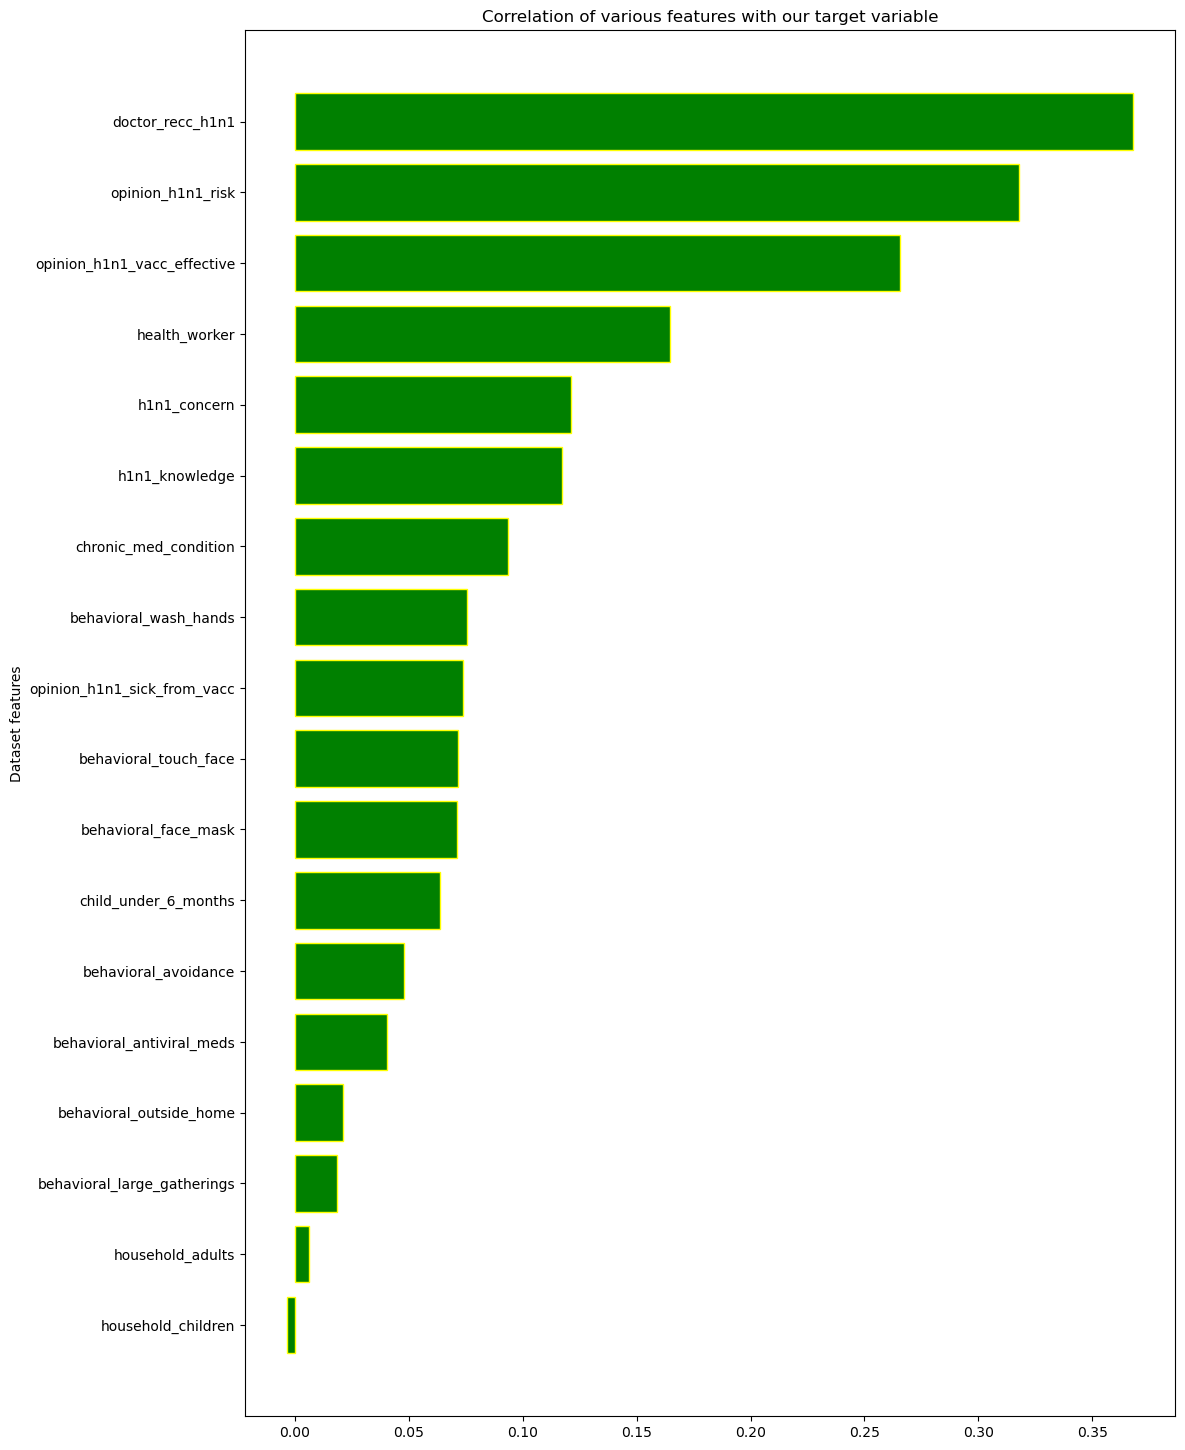

In [ ]:
#Computing the correlation between the features and the target column.
# Drop non-numeric columns from combined_df
numeric_combined_df = combined_df.select_dtypes(include=['number'])

# Calculate correlation with h1n1_vaccine
corr = numeric_combined_df.drop('h1n1_vaccine', axis=1).corrwith(combined_df['h1n1_vaccine'])
#Sorting the values in ascending order
corr = corr.sort_values(ascending=True)
#Creating a bar graph to visualize the different values
fig, ax = plt.subplots(figsize=(12, len(corr)*1.0))
ax.barh(corr.index, corr.values, color='green', edgecolor='yellow')
ax.set_ylabel('Dataset features')
ax.set_title('Correlation of various features with our target variable')
plt.show()

The above visaulization shows us that the values with a high correlation with the target variable are **doctor_recc_h1n1, opinion_h1n1_risk, and opinion_h1n1_vacc_effective**.

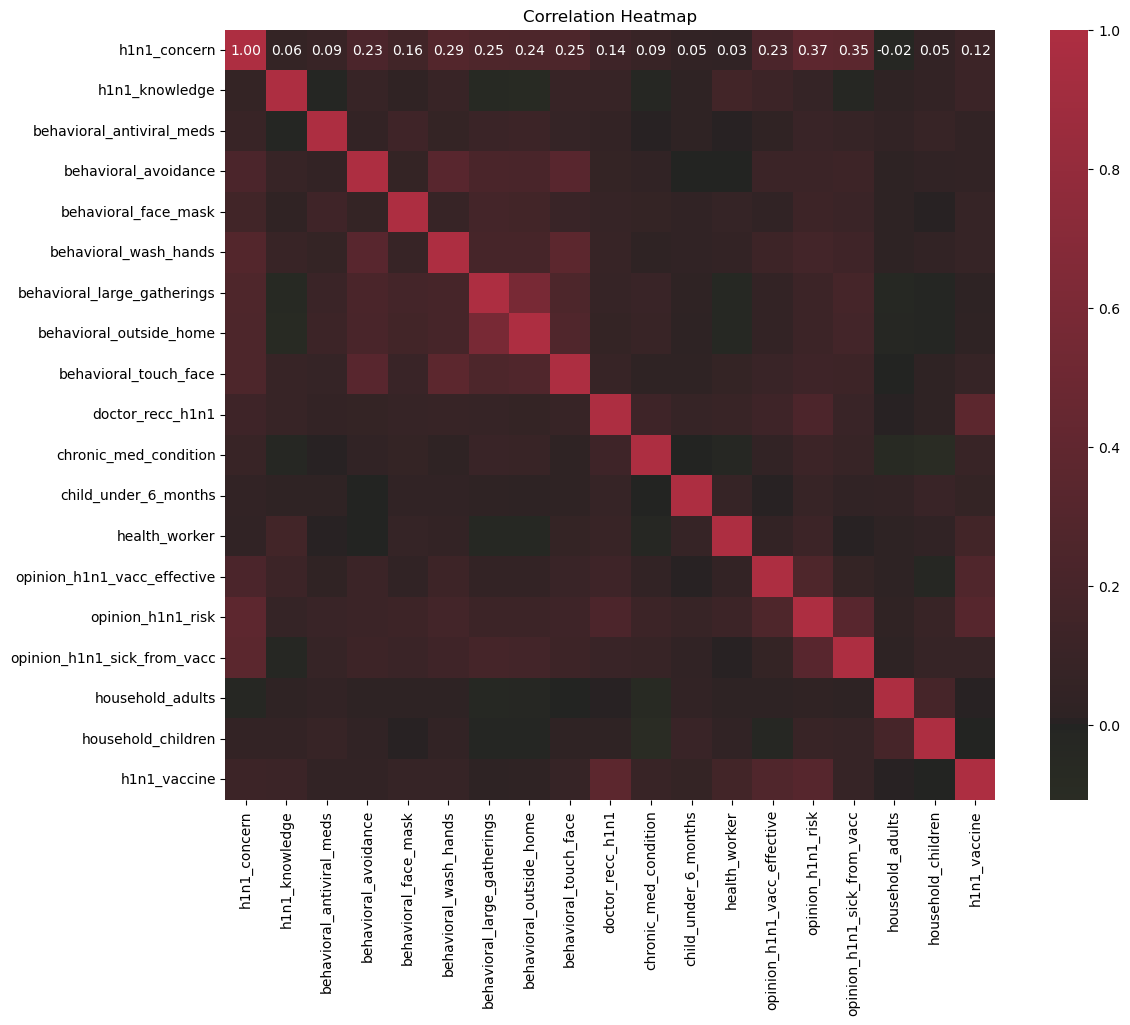

In [ ]:


# Compute the correlation matrix
corr = numeric_combined_df.corr()

# Create a custom diverging palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="dark", as_cmap=True)

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True,center=0,
            fmt='.2f',square=True, cmap=cmap)

plt.title('Correlation Heatmap')
plt.show()


The features behavioral_outside_home and behavioral_large_gatherings will be dropped because of the high level of correlation between them since this is against the classification assumption that the features are independent.

**Feature Engineering**

We will split our data into training and test dataset

In [ ]:
X = combined_df.drop('h1n1_vaccine',axis = 1)
y = combined_df['h1n1_vaccine']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, test_size = 0.3)

In [ ]:

#We identify the categorical columns in our trining dataset
categorical_columns = X_train.select_dtypes(include='object').columns

print("Categorical columns:")
print(categorical_columns)


Categorical columns:
Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'census_msa'],
      dtype='object')


In [ ]:
#We then convert this categorical non-numemrical values into numerical values

label_encoder = LabelEncoder()

X_train['age_group'] = label_encoder.fit_transform(X_train['age_group'])
X_train['education'] = label_encoder.fit_transform(X_train['education'])
X_train['race'] = label_encoder.fit_transform(X_train['race'])
X_train['sex'] = label_encoder.fit_transform(X_train['sex'])
X_train['marital_status'] = label_encoder.fit_transform(X_train['marital_status'])
X_train['rent_or_own'] = label_encoder.fit_transform(X_train['rent_or_own'])
X_train['census_msa'] = label_encoder.fit_transform(X_train['census_msa'])
X_train['employment_status'] = label_encoder.fit_transform(X_train['employment_status'])
X_train['income_poverty'] = label_encoder.fit_transform(X_train['income_poverty'])

X_train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
9573,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,2,3,1,1,0,0,1,1,1.0,0.0
19859,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,2,3,0,0,1,1,2,0,0.0,0.0
6996,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,3,3,0,0,1,0,1,1,0.0,0.0
15355,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,3,3,0,0,1,0,0,2,0.0,0.0
26674,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,3,0,1,0,0,0,0,2.0,1.0


In [ ]:
#We repeat the same process for our test data

label_encoder = LabelEncoder()

X_test['age_group'] = label_encoder.fit_transform(X_test['age_group'])
X_test['education'] = label_encoder.fit_transform(X_test['education'])
X_test['race'] = label_encoder.fit_transform(X_test['race'])
X_test['sex'] = label_encoder.fit_transform(X_test['sex'])
X_test['marital_status'] = label_encoder.fit_transform(X_test['marital_status'])
X_test['rent_or_own'] = label_encoder.fit_transform(X_test['rent_or_own'])
X_test['census_msa'] = label_encoder.fit_transform(X_test['census_msa'])
X_test['employment_status'] = label_encoder.fit_transform(X_test['employment_status'])
X_test['income_poverty'] = label_encoder.fit_transform(X_test['income_poverty'])


X_test.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
10445,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3,3,0,2,1,1,1,2,0.0,0.0
11409,2.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,3,0,0,0,0,1,0,1.0,0.0
17504,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,3,1,1,1,0,0,1,0.0,0.0
19391,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3,2,1,0,1,1,1,0,1.0,1.0
7968,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,3,0,0,0,1,1,0,1,1.0,2.0


In [ ]:
#Our next step will be to normalize the train and the test data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)


**Modelling**

We begin with our baseline model which is a simple logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate a Logistic Regression model with specified parameters
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='sag')

# Fit the Logistic Regression model to the training data
model_log = logreg.fit(X_train_transformed, y_train)

# The trained model is stored in the variable model_log


Evaluating the model

In [ ]:
# Predicting the target variable using the trained logistic regression model on the training data
y_hat_train = logreg.predict(X_train_transformed)

# Calculating the absolute residuals
train_residuals = np.abs(y_train - y_hat_train)

# Printing counts of residuals
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()

# Printing proportions of residuals
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))


Residuals (counts)
0    15191
1     3451
Name: count, dtype: int64

Residuals (proportions)
0    0.81488
1    0.18512
Name: proportion, dtype: float64


In [ ]:
# Predicting the target variable using the trained logistic regression model on the test data
y_hat_test = logreg.predict(X_test_transformed)

# Calculating the absolute residuals for the test data
test_residuals = np.abs(y_test - y_hat_test)

# Printing counts of residuals for the test data
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()

# Printing proportions of residuals for the test data
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))


Residuals (counts)
0    6494
1    1496
Name: count, dtype: int64

Residuals (proportions)
0    0.812766
1    0.187234
Name: proportion, dtype: float64


In [ ]:
 def display_metrics(true, preds):
    
    print(f'Accuracy: {accuracy_score(true, preds)}')
    print(f'F1-Score: {f1_score(true, preds)}')
    print(f'Recall-Score: {recall_score(true, preds)}')
    print(f'Precision-Score: {precision_score(true, preds)}')
    
print('Logistic Regression\n')
display_metrics(y_train, y_hat_train)
print('----\n')
display_metrics(y_test, y_hat_test)

Logistic Regression

Accuracy: 0.8148803776418839
F1-Score: 0.4528301886792453
Recall-Score: 0.35870384325546345
Precision-Score: 0.6139294926913156
----

Accuracy: 0.8127659574468085
F1-Score: 0.4367469879518072
Recall-Score: 0.3431952662721893
Precision-Score: 0.6004140786749482


Although our accuracy levels are at a realistic level of 81%, showing that an individual got the vaccine or not 
the f1 score is too low. Using feature selection before building a K-nearest model in the next step will make the data we use more controlled and improve the accuracy of the model.

**Feature selection**

It is important to select feature based on correlation to build appropiate models. The use of appropiate and fewer features may reduce the occurence of problems such as overfitting.

In [ ]:
#We begin by an analysis of our dataset
X_train_transformed
X_train_transformed.shape

(18642, 27)

In [ ]:
#We then convert the data into a pandas Dataframe
columns = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa', 'household_adults', 'household_children']

X_train_transformed = pd.DataFrame(X_train_transformed, columns=columns)
X_train_transformed

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
0,0.333333,0.5,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.666667,1.0,1.0,0.5,0.0,0.0,0.5,0.5,0.333333,0.000000
1,0.333333,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.666667,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.000000
2,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.000000,1.0,0.0,0.0,1.0,0.0,0.5,0.5,0.000000,0.000000
3,0.666667,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.000000
4,0.333333,0.5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.666667,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18637,0.000000,0.5,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.666667,1.0,1.0,0.0,0.0,0.0,0.5,1.0,0.333333,0.000000
18638,0.666667,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.666667,1.0,1.0,0.5,1.0,0.0,0.0,0.0,0.000000,0.000000
18639,0.666667,0.5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.000000
18640,0.666667,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.666667,1.0,0.0,0.5,0.0,0.0,0.5,1.0,0.333333,0.000000


We will use the scikit-learn SelectKBest method to perform feature selection on our dataset. This we help us select a subset of relevant features from the original set of features.




In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, SelectPercentile

selector = SelectKBest(score_func=chi2, k=10)
X_train_transformed_new = selector.fit_transform(X_train_transformed, y_train)


print("Original number of features:", X_train_transformed.shape[1])
print("Reduced number of features:", X_train_transformed_new.shape[1])

Original number of features: 27
Reduced number of features: 10


In [235]:
#Our next step is to check the selected features
df = pd.DataFrame({'columns': X_train.columns,
                    'scores': selector.scores_,
                   'selected': selector.get_support()})
df

,columns,scores,selected
0,h1n1_concern,46.014720,True
1,h1n1_knowledge,47.548372,True
2,behavioral_antiviral_meds,23.036727,False
3,behavioral_avoidance,13.994965,False
4,behavioral_face_mask,96.811001,True
5,behavioral_wash_hands,21.816694,False
6,behavioral_large_gatherings,4.075825,False
7,behavioral_outside_home,4.176994,False
8,behavioral_touch_face,31.063768,False
9,doctor_recc_h1n1,2022.913655,True


In [236]:
#We then coveert our dataset back to a pandas dataframe using the selected columns
selected_columns =['h1n1_concern','h1n1_knowledge', 'behavioral_face_mask', 'doctor_recc_h1n1', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc']
# X_train_transformed_new = pd.DataFrame(X_train_transformed_new, columns=['h1n1_concern','h1n1_knowledge', 'behavioral_face_mask', 'doctor_recc_h1n1', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc'])
X_train_transformed_new = pd.DataFrame(X_train_transformed_new, columns = selected_columns)
X_train_transformed_new.head()

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc
0,0.333333,0.5,0.0,1.0,0.0,0.0,0.0,1.00,0.25,0.25
1,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.25,0.25
2,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.50,0.25,0.25
3,0.666667,1.0,0.0,0.0,0.0,0.0,1.0,0.75,0.25,0.75
4,0.333333,0.5,0.0,0.0,1.0,0.0,0.0,0.25,0.00,0.00


In [238]:
type(X_train_transformed_new)

pandas.core.frame.DataFrame

In [239]:
# we create a SelectKBest object with chi-squared scoring function and select top 10 features
selector = SelectKBest(score_func=chi2, k=10)

# Next we fit the selector to the test data and transform it
X_test_transformed_new = selector.fit_transform(X_test_transformed, y_test)

# Printing the original number of features in the test data
print("Original number of features:", X_test_transformed.shape[1])

# Printing the reduced number of features after feature selection
print("Reduced number of features:", X_test_transformed_new.shape[1])


Original number of features: 27
Reduced number of features: 10


In [242]:
# We create a new DataFrame from the transformed test data with selected columns
X_test_transformed_new = pd.DataFrame(X_test_transformed_new, columns=selected_columns)


X_test_transformed_new.head()


,h1n1_concern,h1n1_knowledge,behavioral_face_mask,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc
0,0.666667,0.0,0.0,0.0,1.0,0.0,0.0,0.75,1.00,0.75
1,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.25,0.25
2,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.75,0.00
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.00,0.00
4,0.666667,0.0,0.0,0.0,1.0,0.0,1.0,0.75,0.75,0.25


**Decision Tree**

In [245]:
#We begin by fitting the decision tree classifier to our training model.
# We initialize a Decision Tree classifier with entropy as the criterion for splitting
clf = DecisionTreeClassifier(criterion='entropy')

# Our next step is to fit the Decision Tree classifier on the transformed training data
clf.fit(X_train_transformed_new, y_train)

clf


DecisionTreeClassifier(criterion='entropy')

In [246]:
#We then begin to make predictions using our test data
y_preds = clf.predict(X_test_transformed_new)

print('Accuracy: ', accuracy_score(y_test, y_preds))
print('F1-Score: ', f1_score(y_test, y_preds))

Accuracy:  0.7889862327909888
F1-Score:  0.3713646532438479


Our f1-score is 37% here. For us to consider our model to be showing a good performance this score should improve.
Therefore this calls for us to apply hyperparameter tuning.

**Hyperparameter Tuning**

In [247]:
X_train_transformed_new.shape

(18642, 10)

In [250]:
#With this current number of observations and feature
#We could set our:
#max_depth: A value between 5 and 10.
#min_samples_split: A value between 10 and 50.
#min_samples_leaf: A value between 1 and 5.
# Define the hyperparameters grid for tuning
param_grid = {'max_depth': [5, 7, 9, 10],
              'min_samples_split': [12, 25, 36],
              'min_samples_leaf': [2, 3, 5]}

# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(dt, param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV object to find the best hyperparameters
grid_search.fit(X_train_transformed_new, y_train)

# Get the best hyperparameters from the GridSearchCV results
best_params = grid_search.best_params_

# Initialize a new DecisionTreeClassifier with the best hyperparameters
dt_best = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                  min_samples_split=best_params['min_samples_split'],
                                  min_samples_leaf=best_params['min_samples_leaf'])

# Fit the new DecisionTreeClassifier with the best hyperparameters
dt_best.fit(X_train_transformed_new, y_train)

# Predict the target on the test data using the tuned model
y_pred = dt_best.predict(X_test_transformed_new)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average="weighted")

# Print the F1 score and accuracy as percentages
print("F1 Score: {:.2f}%".format(f1 * 100))


Accuracy: 80.38%
F1 Score: 78.58%


**Evaluation of the final model**


Thhe process of hyperparameter tuning proved to improve our model's f1 score from 37% to 78%.
The F1 score of 78.58% represents the harmonic mean of precision and recall. It provides a balanced measure of the model's performance, taking into account both false positives and false negatives. This better performance. This model meets our success metrics and therefore there is no need to repeat the process.

**Conclusion**

The decision tree model, which has undergone hyperparameter tuning is the perfect choice in this case. This is beacuse of the f1-score of 78%. The model is complex enough to be able to handle the problems of unerfitting and overfitting